### Study Group 

### Import the neccessary library

In [1]:
# Imports neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# Load the dataset
module_df = pd.read_csv('data2.csv')
course_df = pd.read_csv('data1.csv')

In [3]:
module_df.head()

,CentreName,AcademicYear,LearnerCode,CourseLevel,ModuleCode,ModuleName,ModuleTotal,Term,ModuleOutcome,ResitsTaken,ModuleTotalBeforeResits,ModuleCreditEquivalence,ModuleCreditsAchieved,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours
0,ISC_Aberdeen,2019/20,2284932,Pre-Masters,P_AES,Academic English Skills,75.25,2020 Sum2,Pass,No,NaN,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2284932,Pre-Masters,P_AF,Accounting & Finance,69.50,2020 Sum2,Pass,No,NaN,15.0,10.4250,NaN,NaN,NaN,NaN,NaN,NaN
2,ISC_Aberdeen,2019/20,2284932,Pre-Masters,P_BE,Business Economics,68.00,2020 Sum2,Pass,No,NaN,15.0,10.2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ISC_Aberdeen,2019/20,2284932,Pre-Masters,P_QBM,Quantitative Methods for Business,87.35,2020 Sum2,Pass,No,NaN,15.0,13.1025,NaN,NaN,NaN,NaN,NaN,NaN
4,ISC_Aberdeen,2019/20,2399500,Foundation,F_AES,Academic English Skills,69.25,2020 Sum1,Pass,Yes,67.25,0.0,0.0000,25.0,0.0,4.0,0.0,100.0,64.0


In [4]:
course_df.head()

,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Sussex,2020/21,2139267,37773931,Direct,Digital (Web),NaN,5/27/1994,Male,Nigerian,...,68.0,BSc (Hons) Mathematics,University of Sussex,Yes,251.0,7.0,0.0,35.0,386.0,88.0
1,ISC_Aberdeen,2020/21,2157299,34202140,Agent,Standard Agent Booking,NaN,9/16/1994,Male,Chinese,...,56.0,MA Economics & Finance,University of Aberdeen,No,192.0,5.0,9.0,26.0,238.0,89.0
2,ISC_Sheffield,2021/22,2161972,38394130,Agent,Standard Agent Booking,NaN,1/10/1999,Female,Chinese,...,63.0,MSc Management,University of Sheffield International College,Yes,232.0,0.0,0.0,39.0,469.0,86.0
3,ISC_Durham,2020/21,2164343,29395152,Agent,Standard Agent Booking,NaN,2/19/1996,Female,Chinese,...,62.0,MSc Finance (Economics and Finance) (alternati...,Durham University,No,205.0,0.0,0.0,18.0,341.0,92.0
4,ISC_LJMU,2020/21,2165315,34626658,Agent,Sponsor,NaN,3/19/1997,Female,Saudi,...,80.0,BEng (Hons) Mechanical Engineering,Liverpool John Moores University,Yes,483.0,20.0,5.0,59.0,492.0,90.0


## Cleaning Dataset 1 - Course Dataset

### Let's modified the center name to remove "ISC_"

In [5]:
# Remove the 'ISC_' prefix and convert to title case
course_df['CentreName'] = course_df['CentreName'].str.replace('ISC_', '', case=False).str.title()
module_df['CentreName'] = module_df['CentreName'].str.replace('ISC_', '', case=False).str.title()

### Let check the nature of the NonCompletionReason and fill it up

In [6]:
course_df["NonCompletionReason"]=course_df["NonCompletionReason"].fillna("Not Applicable")

### Discount Type

In [7]:
course_df['DiscountType']=course_df['DiscountType'].fillna('No Discount')

### Drop Homestate and Homecity

In [8]:
course_data=course_df.drop(columns=['HomeState','HomeCity','BookingId'])

### Termination Date

In [9]:
course_data["new_terminationdate"]=course_data["TerminationDate"].fillna('CompletionDate')

### Assessed Module, PassedModules, FailedModules, CreditWeightedAverage

In [10]:
assessed_cols = ['AssessedModules', 'PassedModules','FailedModules', 'CreditWeightedAverage']

In [11]:
course_data['AssessedModules']= course_data['PresentCount'].fillna(0)
course_data['PassedModules']=course_data['PassedModules'].fillna(0)
course_data['FailedModules']=course_data['FailedModules'].fillna(0)
course_data['CreditWeightedAverage']=course_data['CreditWeightedAverage'].fillna(0)

### Present count, latecount, authorise absent, unauthorise absent, contact

In [12]:

course_data['new_present']= course_data['PresentCount'].fillna(0)
course_data['new_late']=course_data['LateCount'].fillna(0)
course_data['new_auth']=course_data['AuthorisedAbsenceCount'].fillna(0)
course_data['newunath']=course_data['UnauthorisedAbsenceCount'].fillna(0)
course_data['newcontact'] = course_data['ContactHours'].fillna(0)

## Age

In [13]:
course_data.columns

Index(['CentreName', 'AcademicYear', 'LearnerCode', 'BookingType',
       'LeadSource', 'DiscountType', 'DateofBirth', 'Gender', 'Nationality',
       'HomeCountry', 'CourseLevel', 'CourseName', 'CourseFirstIntakeDate',
       'IsFirstIntake', 'CourseStartDate', 'CourseEndDate', 'CompletedCourse',
       'NonCompletionReason', 'ArrivedDate', 'TerminationDate',
       'AssessedModules', 'PassedModules', 'FailedModules',
       'CreditWeightedAverage', 'ProgressionDegree', 'ProgressionUniversity',
       'EligibleToProgress', 'PresentCount', 'LateCount',
       'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'ContactHours',
       'AttendancePercentage', 'new_terminationdate', 'new_present',
       'new_late', 'new_auth', 'newunath', 'newcontact'],
      dtype='object')

In [14]:
course_data['CourseStartDate'] = pd.to_datetime(course_data['CourseStartDate'])
course_data['DateofBirth'] = pd.to_datetime(course_data['DateofBirth'])
# Calculate the age
course_data['age'] = (course_data['CourseStartDate'] - course_data['DateofBirth']).astype('<m8[Y]')

### Eligibility

In [15]:
course_data['Eligible']=course_data['EligibleToProgress'].map({'Yes': 1, 'No': 0})

### Check Missing Value and Replacing them

In [16]:
course_data.isna().sum()

CentreName                      0
AcademicYear                    0
LearnerCode                     0
BookingType                     0
LeadSource                      0
DiscountType                    0
DateofBirth                     0
Gender                          0
Nationality                     0
HomeCountry                   346
CourseLevel                     0
CourseName                      0
CourseFirstIntakeDate           0
IsFirstIntake                   0
CourseStartDate                 0
CourseEndDate                   0
CompletedCourse                 0
NonCompletionReason             0
ArrivedDate                     0
TerminationDate             21305
AssessedModules                 0
PassedModules                   0
FailedModules                   0
CreditWeightedAverage           0
ProgressionDegree             875
ProgressionUniversity           0
EligibleToProgress              0
PresentCount                  208
LateCount                     208
AuthorisedAbse

- The "Totalbeforeresits" mostly applicable to students that take resits for modules
- Any student that doesn't take resit will have NaN under the ModuleTotalBeforeResits
- We are going to change the NaN to '100' toshow that the studends passed the module without resit

### Replacing missing Value

In [17]:
# Replace NaN values in the "ModuleTotalBeforeResits" column with "No Resit"
course_data['HomeCountry'] = course_data['HomeCountry'].fillna('Nationality')

In [18]:
# Replace NaN values in the "ModuleTotalBeforeResits" column with "No Resit"
module_df['ModuleTotalBeforeResits'] = module_df['ModuleTotalBeforeResits'].fillna('100')

In [19]:
module_df.isna().sum()

CentreName                     0
AcademicYear                   0
LearnerCode                    0
CourseLevel                    0
ModuleCode                     0
ModuleName                     0
ModuleTotal                    0
Term                           0
ModuleOutcome                  0
ResitsTaken                    0
ModuleTotalBeforeResits        0
ModuleCreditEquivalence        0
ModuleCreditsAchieved          0
PresentCount                3181
LateCount                   3181
AuthorisedAbsenceCount      3181
UnauthorisedAbsenceCount    3181
AttendancePercentage        4978
ContactHours                3181
dtype: int64

### Let check the nature of the present count

In [20]:
#let see the NaN under Present count
presentcount_nan = module_df[module_df['PresentCount'].isna()]
presentcount_nan

,CentreName,AcademicYear,LearnerCode,CourseLevel,ModuleCode,ModuleName,ModuleTotal,Term,ModuleOutcome,ResitsTaken,ModuleTotalBeforeResits,ModuleCreditEquivalence,ModuleCreditsAchieved,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours
0,Aberdeen,2019/20,2284932,Pre-Masters,P_AES,Academic English Skills,75.25,2020 Sum2,Pass,No,100,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,Aberdeen,2019/20,2284932,Pre-Masters,P_AF,Accounting & Finance,69.50,2020 Sum2,Pass,No,100,15.0,10.4250,NaN,NaN,NaN,NaN,NaN,NaN
2,Aberdeen,2019/20,2284932,Pre-Masters,P_BE,Business Economics,68.00,2020 Sum2,Pass,No,100,15.0,10.2000,NaN,NaN,NaN,NaN,NaN,NaN
3,Aberdeen,2019/20,2284932,Pre-Masters,P_QBM,Quantitative Methods for Business,87.35,2020 Sum2,Pass,No,100,15.0,13.1025,NaN,NaN,NaN,NaN,NaN,NaN
6,Aberdeen,2019/20,2399500,Foundation,F_ES,Environmental Science,62.00,2020 Sum2,Pass,No,100,15.0,9.3000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112482,Sussex,2022/23,2773657,Foundation,F_AESF,Academic English Skills Fasttrack,77.75,2023 Spr,Pass,No,100,0.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
112483,Sussex,2022/23,2773657,Foundation,F_COPR,Computing Project,66.90,2023 Sum,Pass,No,100,10.0,6.6900,NaN,NaN,NaN,NaN,NaN,NaN
112503,Sussex,2022/23,2778533,Pre-Masters,P_CRSS,Critical Reading Social Science,67.00,2023 Spr,Pass,No,100,15.0,10.0500,NaN,NaN,NaN,NaN,NaN,NaN
112508,Sussex,2022/23,2778738,Pre-Masters,P_CRSS,Critical Reading Social Science,54.00,2023 Spr,Pass,No,100,15.0,8.1000,NaN,NaN,NaN,NaN,NaN,NaN


- Looking at the attendance data (PresentCount, LateCount, AuthorisedAbsenceCount, UnauthorisedAbsenceCount, AttendancePercentage, ContactHours), it is either the attendance is missing or the students is absent
- we will replace all the NaN with 0

In [21]:
#Let's extract all the attendance columns
attendance_cols = ["PresentCount", "LateCount", "AuthorisedAbsenceCount", "UnauthorisedAbsenceCount", "AttendancePercentage", "ContactHours"]

#### Let's replace all nan with 0

In [22]:
module_df[attendance_cols] = module_df[attendance_cols].fillna(0)

In [23]:
module_df.isna().sum()

CentreName                  0
AcademicYear                0
LearnerCode                 0
CourseLevel                 0
ModuleCode                  0
ModuleName                  0
ModuleTotal                 0
Term                        0
ModuleOutcome               0
ResitsTaken                 0
ModuleTotalBeforeResits     0
ModuleCreditEquivalence     0
ModuleCreditsAchieved       0
PresentCount                0
LateCount                   0
AuthorisedAbsenceCount      0
UnauthorisedAbsenceCount    0
AttendancePercentage        0
ContactHours                0
dtype: int64

### Check Duplicate

In [24]:
duplicates = module_df.duplicated()
duplicates.sum()

0

- There is no duplicates in the dataset

## Eploratory Data Analysis of the course_df

In [25]:
#Checking the distribution of the course data
course_data.describe()

,LearnerCode,AssessedModules,PassedModules,FailedModules,CreditWeightedAverage,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,new_present,new_late,new_auth,newunath,newcontact,age,Eligible
count,2.505900e+04,25059.000000,25059.000000,25059.000000,25059.000000,24851.000000,24851.000000,24851.000000,24851.000000,24851.000000,24851.000000,25059.000000,25059.000000,25059.000000,25059.000000,25059.000000,25059.000000,25059.000000
mean,2.606594e+06,192.344866,5.085837,0.462269,57.016162,193.954770,2.849423,15.120639,40.491892,375.367671,81.021689,192.344866,2.825771,14.995131,40.155792,372.251965,20.346822,0.729798
std,8.798838e+04,95.091870,2.758312,1.253602,25.854258,93.839703,5.193792,28.918253,39.029384,122.578535,20.768541,95.091870,5.178648,28.830640,39.040303,126.730613,3.045002,0.444073
min,2.139267e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,2.538411e+06,131.000000,4.000000,0.000000,54.000000,134.000000,0.000000,0.000000,12.000000,301.000000,76.000000,131.000000,0.000000,0.000000,12.000000,296.000000,18.000000,0.000000
50%,2.607941e+06,202.000000,6.000000,0.000000,66.000000,203.000000,1.000000,1.000000,29.000000,386.000000,88.000000,202.000000,1.000000,1.000000,29.000000,385.000000,19.000000,1.000000
75%,2.665460e+06,254.000000,7.000000,0.000000,73.000000,254.000000,3.000000,15.000000,56.000000,479.000000,95.000000,254.000000,3.000000,15.000000,56.000000,478.000000,22.000000,1.000000
max,2.831468e+06,720.000000,11.000000,10.000000,98.000000,720.000000,85.000000,292.000000,343.000000,792.000000,100.000000,720.000000,85.000000,292.000000,343.000000,792.000000,60.000000,1.000000


In [26]:
#Checking the distribution of the course data
course_data.describe(include=object)

,CentreName,AcademicYear,BookingType,LeadSource,DiscountType,Gender,Nationality,HomeCountry,CourseLevel,CourseName,CourseFirstIntakeDate,CourseEndDate,CompletedCourse,NonCompletionReason,ArrivedDate,TerminationDate,ProgressionDegree,ProgressionUniversity,EligibleToProgress,new_terminationdate
count,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,25059,3754,24184,25059,25059,25059
unique,19,4,2,7,12,2,151,144,4,172,61,95,2,10,557,681,2616,40,2,682
top,Sheffield,2021/22,Agent,Standard Agent Booking,No Discount,Male,Chinese,China PRC,Foundation,"Pre-Masters Business, Social Sciences and Huma...",9/14/2020,6/5/2020,Yes,Not Applicable,9/26/2022,4/14/2022,BSc (Hons) Computer Science,University of Sheffield International College,Yes,CompletionDate
freq,5877,7134,21878,20284,17464,15655,9042,8849,14666,1682,3492,1423,21305,21305,1002,105,998,5877,18288,21305


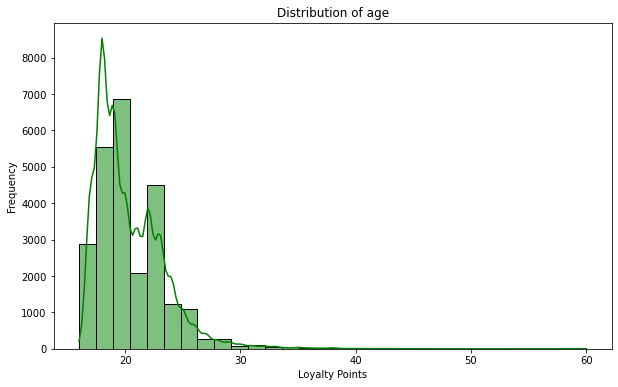

In [27]:
# Histogram of Loyalty Points
plt.figure(figsize=(10, 6))
sns.histplot(course_data['age'], bins=30, kde=True, color='green')
plt.title('Distribution of age')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.show()

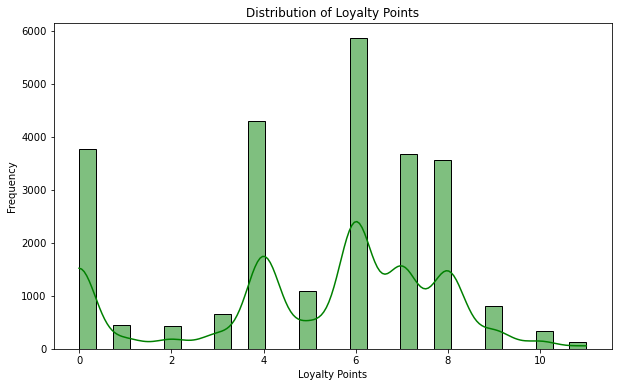

In [28]:
# Histogram of Loyalty Points
plt.figure(figsize=(10, 6))
sns.histplot(course_data['PassedModules'], bins=30, kde=True, color='green')
plt.title('Distribution of Loyalty Points')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.show()

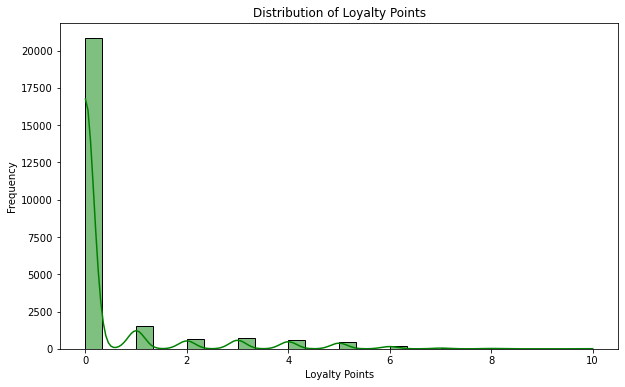

In [29]:
# Histogram of Loyalty Points
plt.figure(figsize=(10, 6))
sns.histplot(course_data['FailedModules'], bins=30, kde=True, color='green')
plt.title('Distribution of Loyalty Points')
plt.xlabel('Loyalty Points')
plt.ylabel('Frequency')
plt.show()

In [30]:
module_df

,CentreName,AcademicYear,LearnerCode,CourseLevel,ModuleCode,ModuleName,ModuleTotal,Term,ModuleOutcome,ResitsTaken,ModuleTotalBeforeResits,ModuleCreditEquivalence,ModuleCreditsAchieved,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours
0,Aberdeen,2019/20,2284932,Pre-Masters,P_AES,Academic English Skills,75.25,2020 Sum2,Pass,No,100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberdeen,2019/20,2284932,Pre-Masters,P_AF,Accounting & Finance,69.50,2020 Sum2,Pass,No,100,15.0,10.4250,0.0,0.0,0.0,0.0,0.0,0.0
2,Aberdeen,2019/20,2284932,Pre-Masters,P_BE,Business Economics,68.00,2020 Sum2,Pass,No,100,15.0,10.2000,0.0,0.0,0.0,0.0,0.0,0.0
3,Aberdeen,2019/20,2284932,Pre-Masters,P_QBM,Quantitative Methods for Business,87.35,2020 Sum2,Pass,No,100,15.0,13.1025,0.0,0.0,0.0,0.0,0.0,0.0
4,Aberdeen,2019/20,2399500,Foundation,F_AES,Academic English Skills,69.25,2020 Sum1,Pass,Yes,67.25,0.0,0.0000,25.0,0.0,4.0,0.0,100.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113468,Teesside,2022/23,2786493,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,82.00,2023 Sum1,Pass,No,100,20.0,16.4000,31.0,0.0,0.0,0.0,100.0,66.0
113469,Teesside,2022/23,2786493,Pre-Masters,P_RMP,Research Methods & Research Project,75.00,2023 Sum1,Pass,No,100,20.0,15.0000,22.0,0.0,0.0,0.0,100.0,44.0
113470,Teesside,2022/23,2800476,Pre-Masters,P_AES,Academic English Skills,52.00,2023 Sum1,Pass,Yes,46.75,0.0,0.0000,33.0,0.0,0.0,0.0,100.0,66.0
113471,Teesside,2022/23,2800476,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,64.00,2023 Sum1,Pass,No,100,20.0,12.8000,31.0,0.0,0.0,0.0,100.0,66.0


In [31]:
#Checking the distribution of the module data
module_df.describe()

,LearnerCode,ModuleTotal,ModuleCreditEquivalence,ModuleCreditsAchieved,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours
count,1.134730e+05,113473.000000,113473.000000,113473.000000,113473.000000,113473.000000,113473.000000,113473.000000,113473.000000,113473.000000
mean,2.595771e+06,66.837126,8.277692,5.257072,30.083905,0.442978,1.001815,4.139698,84.745472,54.703101
std,8.781143e+04,18.059698,10.742142,7.142513,19.574850,1.322254,3.101719,6.423073,23.112143,34.000204
min,2.139267e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.529222e+06,60.500000,1.000000,0.593500,16.000000,0.000000,0.000000,0.000000,81.000000,31.000000
50%,2.592342e+06,68.800000,1.000000,0.808000,26.000000,0.000000,0.000000,2.000000,93.000000,45.000000
75%,2.656841e+06,77.600000,15.000000,9.480000,42.000000,0.000000,1.000000,5.000000,100.000000,75.000000
max,2.831468e+06,100.000000,45.000000,42.390000,145.000000,48.000000,79.000000,97.000000,100.000000,195.000000


In [32]:
#Checking the distribution of the module data
module_df.describe(include=object)

,CentreName,AcademicYear,CourseLevel,ModuleCode,ModuleName,Term,ModuleOutcome,ResitsTaken,ModuleTotalBeforeResits
count,113473,113473,113473,113473,113473,113473,113473,113473,113473
unique,19,4,2,669,613,19,2,2,2111
top,Sheffield,2019/20,Foundation,F_AES,Academic English Skills,2020 Sum1,Pass,No,100
freq,30971,36316,82530,12848,15082,12464,105528,89856,89856


In [33]:
course_data

,CentreName,AcademicYear,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeCountry,...,ContactHours,AttendancePercentage,new_terminationdate,new_present,new_late,new_auth,newunath,newcontact,age,Eligible
0,Sussex,2020/21,2139267,Direct,Digital (Web),No Discount,1994-05-27,Male,Nigerian,United Kingdom,...,386.0,88.0,CompletionDate,251.0,7.0,0.0,35.0,386.0,26.0,1
1,Aberdeen,2020/21,2157299,Agent,Standard Agent Booking,No Discount,1994-09-16,Male,Chinese,China PRC,...,238.0,89.0,CompletionDate,192.0,5.0,9.0,26.0,238.0,26.0,0
2,Sheffield,2021/22,2161972,Agent,Standard Agent Booking,No Discount,1999-01-10,Female,Chinese,China PRC,...,469.0,86.0,CompletionDate,232.0,0.0,0.0,39.0,469.0,22.0,1
3,Durham,2020/21,2164343,Agent,Standard Agent Booking,No Discount,1996-02-19,Female,Chinese,China PRC,...,341.0,92.0,CompletionDate,205.0,0.0,0.0,18.0,341.0,24.0,0
4,Ljmu,2020/21,2165315,Agent,Sponsor,No Discount,1997-03-19,Female,Saudi,United Kingdom,...,492.0,90.0,CompletionDate,483.0,20.0,5.0,59.0,492.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25054,Online,2022/23,2831028,Agent,Standard Agent Booking,No Discount,1996-05-29,Male,Chinese,China PRC,...,172.0,100.0,CompletionDate,147.0,3.0,0.0,0.0,172.0,26.0,1
25055,Online,2022/23,2831145,Agent,Standard Agent Booking,No Discount,2000-12-13,Male,Chinese,China PRC,...,172.0,99.0,CompletionDate,153.0,2.0,0.0,2.0,172.0,22.0,1
25056,Online,2022/23,2831148,Agent,Standard Agent Booking,No Discount,1997-09-21,Male,Chinese,China PRC,...,172.0,97.0,CompletionDate,150.0,3.0,0.0,4.0,172.0,25.0,1
25057,Online,2022/23,2831159,Agent,Standard Agent Booking,No Discount,2001-06-01,Male,Chinese,China PRC,...,169.0,99.0,CompletionDate,143.0,9.0,0.0,1.0,169.0,21.0,0


In [34]:
module_df

,CentreName,AcademicYear,LearnerCode,CourseLevel,ModuleCode,ModuleName,ModuleTotal,Term,ModuleOutcome,ResitsTaken,ModuleTotalBeforeResits,ModuleCreditEquivalence,ModuleCreditsAchieved,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours
0,Aberdeen,2019/20,2284932,Pre-Masters,P_AES,Academic English Skills,75.25,2020 Sum2,Pass,No,100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberdeen,2019/20,2284932,Pre-Masters,P_AF,Accounting & Finance,69.50,2020 Sum2,Pass,No,100,15.0,10.4250,0.0,0.0,0.0,0.0,0.0,0.0
2,Aberdeen,2019/20,2284932,Pre-Masters,P_BE,Business Economics,68.00,2020 Sum2,Pass,No,100,15.0,10.2000,0.0,0.0,0.0,0.0,0.0,0.0
3,Aberdeen,2019/20,2284932,Pre-Masters,P_QBM,Quantitative Methods for Business,87.35,2020 Sum2,Pass,No,100,15.0,13.1025,0.0,0.0,0.0,0.0,0.0,0.0
4,Aberdeen,2019/20,2399500,Foundation,F_AES,Academic English Skills,69.25,2020 Sum1,Pass,Yes,67.25,0.0,0.0000,25.0,0.0,4.0,0.0,100.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113468,Teesside,2022/23,2786493,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,82.00,2023 Sum1,Pass,No,100,20.0,16.4000,31.0,0.0,0.0,0.0,100.0,66.0
113469,Teesside,2022/23,2786493,Pre-Masters,P_RMP,Research Methods & Research Project,75.00,2023 Sum1,Pass,No,100,20.0,15.0000,22.0,0.0,0.0,0.0,100.0,44.0
113470,Teesside,2022/23,2800476,Pre-Masters,P_AES,Academic English Skills,52.00,2023 Sum1,Pass,Yes,46.75,0.0,0.0000,33.0,0.0,0.0,0.0,100.0,66.0
113471,Teesside,2022/23,2800476,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,64.00,2023 Sum1,Pass,No,100,20.0,12.8000,31.0,0.0,0.0,0.0,100.0,66.0


In [35]:
selected_columns = course_data[['LearnerCode', 'age', 'Eligible','ProgressionDegree','ProgressionUniversity']]

In [36]:
new_df = module_df.merge(selected_columns, on='LearnerCode', how='left')

In [37]:
new_df['ModuleStatus']=new_df['ModuleOutcome'].map({'Pass': 1, 'Fail': 0})

In [38]:
new_df

,CentreName,AcademicYear,LearnerCode,CourseLevel,ModuleCode,ModuleName,ModuleTotal,Term,ModuleOutcome,ResitsTaken,...,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,AttendancePercentage,ContactHours,age,Eligible,ProgressionDegree,ProgressionUniversity,ModuleStatus
0,Aberdeen,2019/20,2284932,Pre-Masters,P_AES,Academic English Skills,75.25,2020 Sum2,Pass,No,...,0.0,0.0,0.0,0.0,0.0,22.0,1,Msc Econ Accounting and Investment Management,University of Aberdeen,1
1,Aberdeen,2019/20,2284932,Pre-Masters,P_AF,Accounting & Finance,69.50,2020 Sum2,Pass,No,...,0.0,0.0,0.0,0.0,0.0,22.0,1,Msc Econ Accounting and Investment Management,University of Aberdeen,1
2,Aberdeen,2019/20,2284932,Pre-Masters,P_BE,Business Economics,68.00,2020 Sum2,Pass,No,...,0.0,0.0,0.0,0.0,0.0,22.0,1,Msc Econ Accounting and Investment Management,University of Aberdeen,1
3,Aberdeen,2019/20,2284932,Pre-Masters,P_QBM,Quantitative Methods for Business,87.35,2020 Sum2,Pass,No,...,0.0,0.0,0.0,0.0,0.0,22.0,1,Msc Econ Accounting and Investment Management,University of Aberdeen,1
4,Aberdeen,2019/20,2399500,Foundation,F_AES,Academic English Skills,69.25,2020 Sum1,Pass,Yes,...,0.0,4.0,0.0,100.0,64.0,21.0,1,BSc Biological Sciences,University of Aberdeen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114774,Teesside,2022/23,2786493,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,82.00,2023 Sum1,Pass,No,...,0.0,0.0,0.0,100.0,66.0,25.0,1,MSc International Management,Teesside University,1
114775,Teesside,2022/23,2786493,Pre-Masters,P_RMP,Research Methods & Research Project,75.00,2023 Sum1,Pass,No,...,0.0,0.0,0.0,100.0,44.0,25.0,1,MSc International Management,Teesside University,1
114776,Teesside,2022/23,2800476,Pre-Masters,P_AES,Academic English Skills,52.00,2023 Sum1,Pass,Yes,...,0.0,0.0,0.0,100.0,66.0,35.0,1,MSc International Management,Teesside University,1
114777,Teesside,2022/23,2800476,Pre-Masters,P_CRAWS,Crit Reading & Appl Academic Writing Skills,64.00,2023 Sum1,Pass,No,...,0.0,0.0,0.0,100.0,66.0,35.0,1,MSc International Management,Teesside University,1


### Exploratory data analysis of the Module data (Dataset 2)

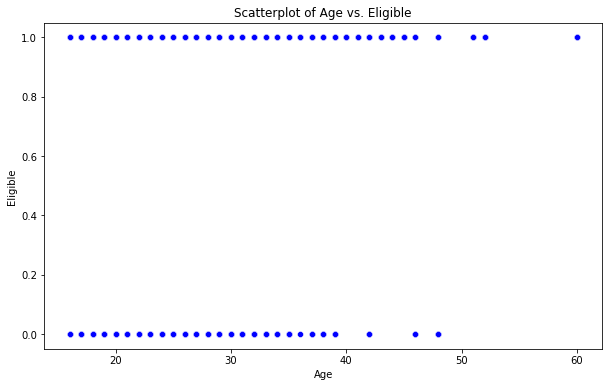

In [39]:
# Scatterplot of Age vs. Eligible
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Eligible', data=new_df, color='blue')
plt.title('Scatterplot of Age vs. Eligible')
plt.xlabel('Age')
plt.ylabel('Eligible')
plt.show()

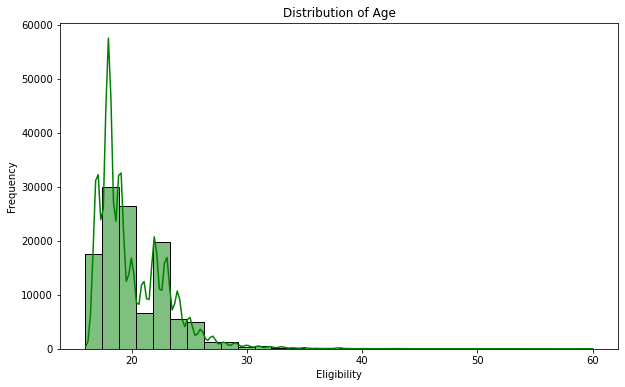

In [40]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(new_df['age'], bins=30, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Eligibility')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Group by ProgressionDegree and sum the Eligible column
eligible_counts = new_df.groupby('ProgressionDegree')['Eligible'].sum().reset_index()
eligible_counts

,ProgressionDegree,Eligible
0,(BComm) Commerce,11
1,(BEng) Architectural Engineering,7
2,(BSc) Urban Planning and Development,7
3,A (Hons) Business and Digital Marketing Manage...,6
4,Accounting & Management,12
...,...,...
2432,Veterinary Biosciences BSc (Hons) (with Placem...,8
2433,management,0
2434,media and culture placement year,6
2435,media&cultural studies(placement),6


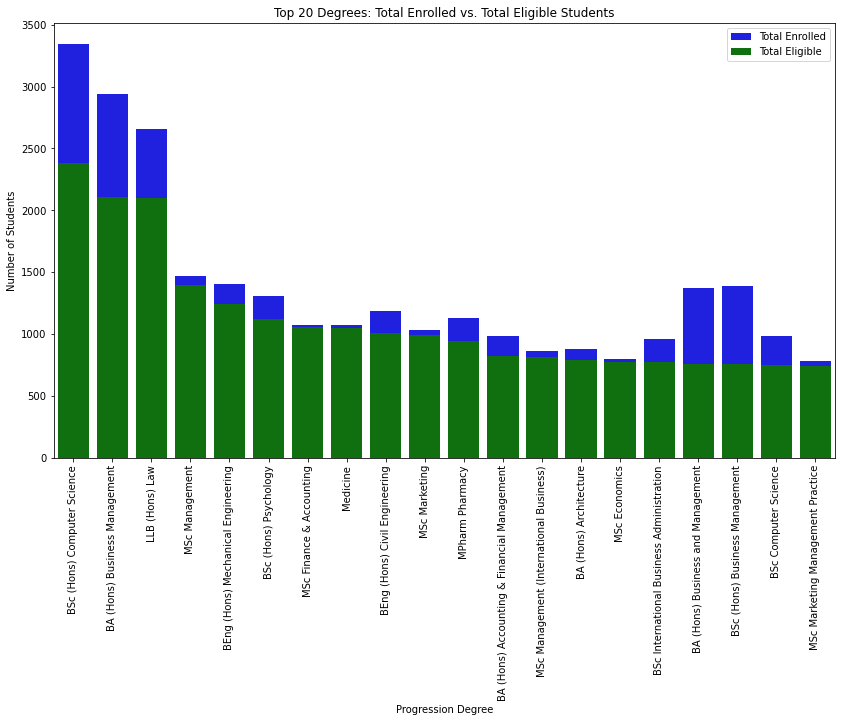

In [42]:
# Group by ProgressionDegree and calculate the total enrollments and eligible students
degree_counts = new_df.groupby('ProgressionDegree').agg(
    TotalEnrolled=('LearnerCode', 'size'),
    TotalEligible=('Eligible', 'sum')
).reset_index()

# Sort by the number of eligible students and select the top 20 degrees
top_20_degrees = degree_counts.sort_values(by='TotalEligible', ascending=False).head(20)

# Plot the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='ProgressionDegree', y='TotalEnrolled', data=top_20_degrees, color='blue', label='Total Enrolled')
sns.barplot(x='ProgressionDegree', y='TotalEligible', data=top_20_degrees, color='green', label='Total Eligible')
plt.title('Top 20 Degrees: Total Enrolled vs. Total Eligible Students')
plt.xlabel('Progression Degree')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

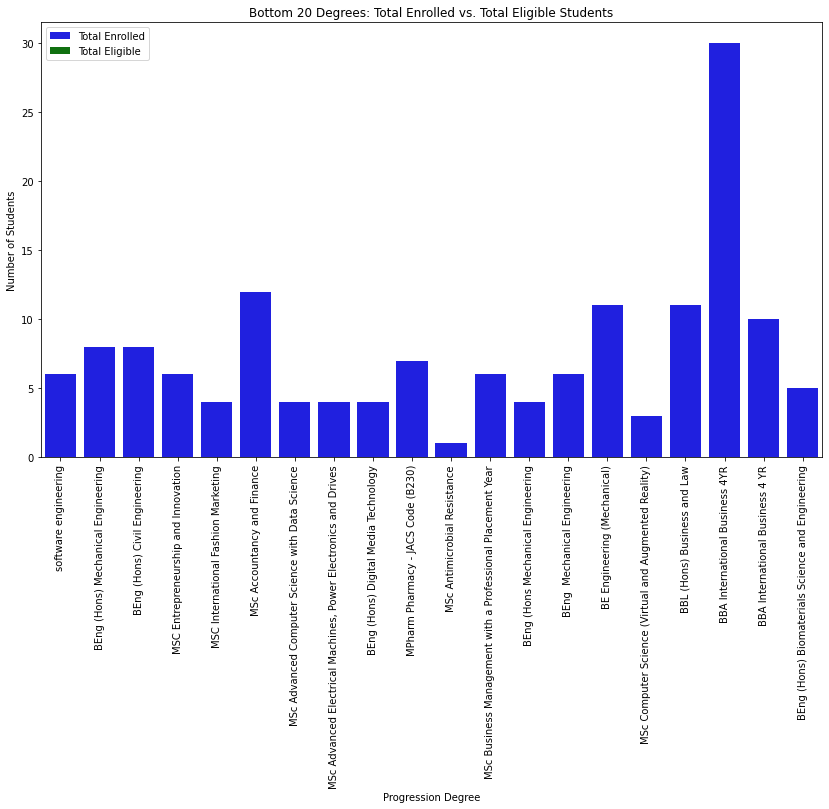

In [43]:
# Group by ProgressionDegree and calculate the total enrollments and eligible students
degree_counts = new_df.groupby('ProgressionDegree').agg(
    TotalEnrolled=('LearnerCode', 'size'),
    TotalEligible=('Eligible', 'sum')
).reset_index()

# Sort by the number of eligible students and select the top 20 degrees
bottom_20_degrees = degree_counts.sort_values(by='TotalEligible', ascending=True).head(20)

# Plot the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='ProgressionDegree', y='TotalEnrolled', data=bottom_20_degrees, color='blue', label='Total Enrolled')
sns.barplot(x='ProgressionDegree', y='TotalEligible', data=bottom_20_degrees, color='green', label='Total Eligible')
plt.title('Bottom 20 Degrees: Total Enrolled vs. Total Eligible Students')
plt.xlabel('Progression Degree')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [44]:
# Calculate the percentage of eligible students
degree_counts['PercentageEligible'] = (degree_counts['TotalEligible'] / degree_counts['TotalEnrolled']) * 100

In [45]:
degree_counts

,ProgressionDegree,TotalEnrolled,TotalEligible,PercentageEligible
0,(BComm) Commerce,11,11,100.0
1,(BEng) Architectural Engineering,7,7,100.0
2,(BSc) Urban Planning and Development,7,7,100.0
3,A (Hons) Business and Digital Marketing Manage...,6,6,100.0
4,Accounting & Management,12,12,100.0
...,...,...,...,...
2432,Veterinary Biosciences BSc (Hons) (with Placem...,8,8,100.0
2433,management,4,0,0.0
2434,media and culture placement year,6,6,100.0
2435,media&cultural studies(placement),6,6,100.0


In [46]:
# Filter degrees into groups based on eligibility percentage
group_1 = degree_counts[degree_counts['PercentageEligible'] >= 70]
group_2 = degree_counts[(degree_counts['PercentageEligible'] >= 50) & (degree_counts['PercentageEligible'] < 70)]
group_3 = degree_counts[degree_counts['PercentageEligible'] < 50]

In [47]:
group_3

,ProgressionDegree,TotalEnrolled,TotalEligible,PercentageEligible
18,Aerospace Engineering,4,0,0.0
21,Architectural Engineering BEng (Hons),4,0,0.0
22,Architecture,4,0,0.0
40,BA (Hons) Advertising and Marketing Communication,3,0,0.0
57,BA (Hons) Broadcast Media Technologies,4,0,0.0
...,...,...,...,...
2417,Pre-Masters Programme (Business and Management...,5,0,0.0
2423,Psychology and Management,6,0,0.0
2427,Sociology,5,0,0.0
2433,management,4,0,0.0


In [48]:
group_3_sorted = group_3.sort_values(by='TotalEligible', ascending=False)
group_3_sorted

,ProgressionDegree,TotalEnrolled,TotalEligible,PercentageEligible
210,BA (Hons) Global Business Management,668,240,35.928144
829,BSc (Hons) Business and Management,242,111,45.867769
828,BSc (Hons) Business Management with Business E...,303,84,27.722772
1242,BSc Economics and Finance,112,49,43.750000
812,BSc (Hons) Business,97,48,49.484536
...,...,...,...,...
952,BSc (Hons) Financial Mathematics (PTY),7,0,0.000000
959,BSc (Hons) Forensic Psychology and Criminal Ju...,3,0,0.000000
963,BSc (Hons) Games and Multimedia Environments (...,2,0,0.000000
970,BSc (Hons) Health Studies,6,0,0.000000


In [49]:
group_2_sorted = group_2.sort_values(by='TotalEligible', ascending=False)
group_2_sorted

,ProgressionDegree,TotalEnrolled,TotalEligible,PercentageEligible
94,BA (Hons) Business and Management,1371,761,55.506929
816,BSc (Hons) Business Management,1392,754,54.166667
2154,MSc International Business Management,549,359,65.391621
918,BSc (Hons) Economics,333,204,61.261261
75,BA (Hons) Business Management & Economics,244,170,69.672131
...,...,...,...,...
568,BEng (Hons) Electrical Engineering (Power and ...,8,4,50.000000
1381,BSc(Econ) Financial and Business Economics,8,4,50.000000
1077,BSc (Hons) Politics and International Relations,8,4,50.000000
869,BSc (Hons) Computer Science Software Engineering,8,4,50.000000
